# **Project Name**    -  **Airbnb NYC 2019 Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

Data analysis is critical for Airbnb to extract valuable insights from its extensive dataset. By analyzing this data, Airbnb can gain a comprehensive understanding of customer behaviors, optimize pricing strategies based on market trends and regional variations, identify top-performing hosts, and enhance operational efficiency. 

These insights play a pivotal role in guiding strategic decisions, improving guest experiences, and driving sustainable growth in the competitive hospitality marketplace. By leveraging data analysis effectively, Airbnb can remain agile in responding to market dynamics and meeting evolving customer expectations, ensuring continued success and innovation in the industry.

#### **Define Your Business Objective?**

***Explore and analyse the data to discover key understandings.***

# **General Guidelines** : -  

1. Main Libraries to be used:
  * Pandas for data manipulation, aggregation
  * Matplotlib and Seaborn for visualisation and behaviour with respect to the target variable. Use at least 5 different       visualisations.
  * NumPy for computationally efficient operations
2. Efficient approach to the problem statement
3. Data Exploration techniques and logic.
4. Logic of handling missing values, and outliers.
5. Visualization logic.
6. Forming insights and explaining your understandings
7. Understanding of how your project is useful to stakeholders.

# ***GitHub Link :-***

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
#Import chardet for identifing encoding so that unicode error can be avoided.
import chardet

In [3]:
#Identifing the unicode encoding
#I have done this test so that I can ensure that data set has encoding utf-8 or not.
with open('Airbnb_NYC_2019.csv','rb') as rd:
    res=chardet.detect(rd.read())
print(res)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [4]:
# Load Dataset
df=pd.read_csv("Airbnb_NYC_2019.csv")

### Dataset First View

In [5]:
# Dataset First
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns
df.shape

(48895, 16)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


## Changing data type to date.

In [10]:
df['last_review']=pd.to_datetime(df['last_review'])

<Axes: >

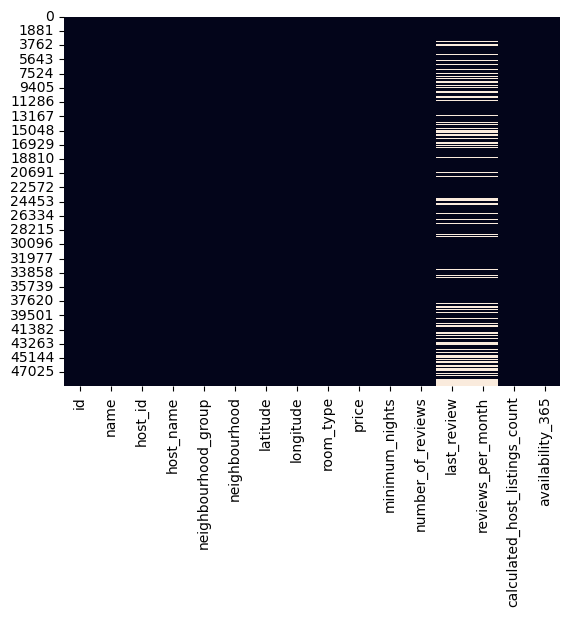

In [11]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

## Droping unwanted coloumns

In [12]:
df=df.drop(['latitude','longitude'],axis=1)

### Droping the Null Values

In [13]:
#Droping null values
df2=df.dropna()
print(df2.isnull().sum())
print(df2.head())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name neighbourhood_group neighbourhood        room_t

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  int64         
 1   name                            38821 non-null  object        
 2   host_id                         38821 non-null  int64         
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   room_type                       38821 non-null  object        
 7   price                           38821 non-null  int64         
 8   minimum_nights                  38821 non-null  int64         
 9   number_of_reviews               38821 non-null  int64         
 10  last_review                     38821 non-null  datetime64[ns]
 11  re

### What did you know about your dataset?

The dataset given is a dataset from Airbnb 2019 data, and we have to analysis the price of the rooms and the insights behind it.

The goal is to understand Price of the Rooms according the other factors.

The above dataset has 38821 rows and 16 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df2.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [16]:
# Dataset Describe
df2.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  int64         
 1   name                            38821 non-null  object        
 2   host_id                         38821 non-null  int64         
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   room_type                       38821 non-null  object        
 7   price                           38821 non-null  int64         
 8   minimum_nights                  38821 non-null  int64         
 9   number_of_reviews               38821 non-null  int64         
 10  last_review                     38821 non-null  datetime64[ns]
 11  re

### outliers detection

<Axes: xlabel='price', ylabel='Count'>

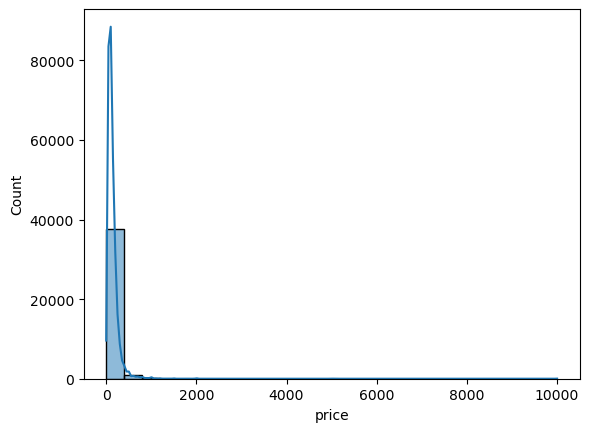

In [18]:
#ploting histogram for knowing the skuwness or for outlier detection of data so that I can choose mean or mediean accordinglly.
sns.histplot(df2['price'],bins=25,kde=True)

<Axes: >

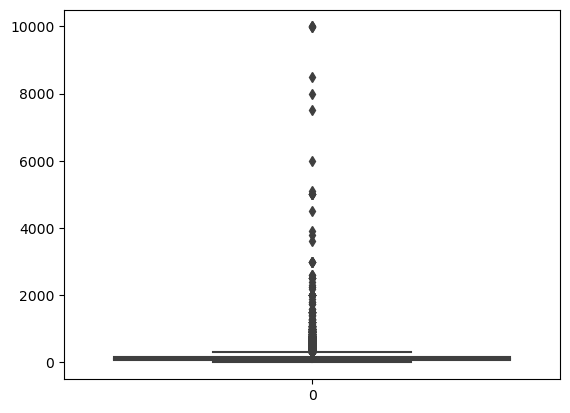

In [19]:
#To see outliers properly using boxplot.
sns.boxplot(df2['price'])

## Removing outliears with Z-score method

In [20]:
#finding limits.
upper_limit=df2['price'].mean()+3*df2['price'].std()
lower_limit=df2['price'].mean()-3*df2['price'].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  733.3167939650605
lower limit:  -448.6517415449786


In [21]:
#finding the outliers.
df2.loc[(df2['price']>upper_limit)|(df2['price']<lower_limit)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
662,250801,Heart & Soul of Greenwich Village,1314834,Rhona,Manhattan,Greenwich Village,Entire home/apt,850,3,107,2019-05-23,1.15,1,249
691,256328,Luxury Chelsea Townhouse at the High Line,1347034,Janine,Manhattan,Chelsea,Entire home/apt,760,2,7,2019-06-22,0.08,1,361
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47041,35569459,Luxury Full Floor SoHo Loft | 3 Bed/2 Bath,163029687,Anna + Jason,Manhattan,SoHo,Entire home/apt,900,3,1,2019-07-06,1.00,1,292
47063,35576863,JAVITS Beautiful Stay for your NYC Vacation *****,83819376,Ryan & Mary,Manhattan,Hell's Kitchen,Entire home/apt,843,1,4,2019-07-04,4.00,1,358
47391,35713184,"Prospect Park Historic 1BR near 2,5,Q, B, S tr...",11503187,A,Brooklyn,Prospect-Lefferts Gardens,Entire home/apt,1400,10,1,2019-07-02,1.00,1,17
47400,35715171,Host yr PARTY in style -Manhattan ROOF TOP for 25,71276635,Joe,Manhattan,Washington Heights,Entire home/apt,750,1,1,2019-07-07,1.00,5,364


In [22]:
# Triming the outliers data
new_df=df2.loc[(df2['price']<upper_limit)&(df2['price']>lower_limit)]
print("old Data before removing outliers : ",len(df2))
print("New Data after removing outliers: ",len(new_df))

old Data before removing outliers :  38821
New Data after removing outliers:  38509


<Axes: xlabel='price', ylabel='Count'>

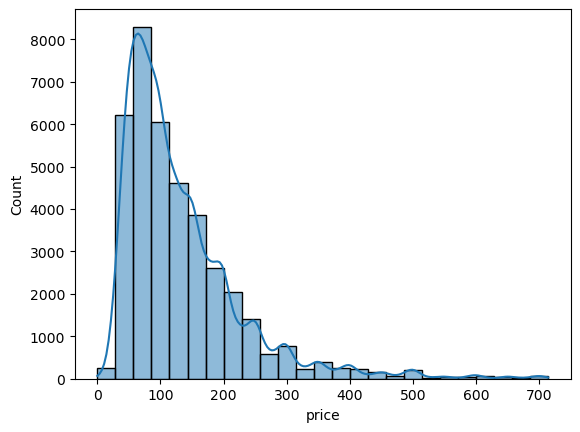

In [23]:
# Now checking the graph.
sns.histplot(new_df['price'],bins=25,kde=True)

In [24]:
# Capping - change the outlier to upper (or) lower limit values
new_df=df2.copy()
new_df.loc[(new_df['price']>upper_limit),'price']=upper_limit
new_df.loc[(new_df['price']<lower_limit),'price']=lower_limit

<Axes: >

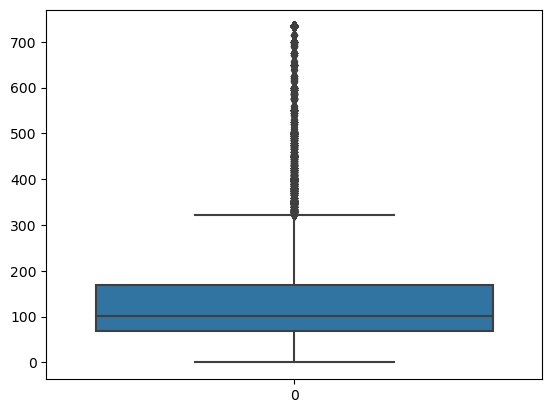

In [25]:
# Ploting box plot
sns.boxplot(new_df['price'])

<Axes: xlabel='price', ylabel='Count'>

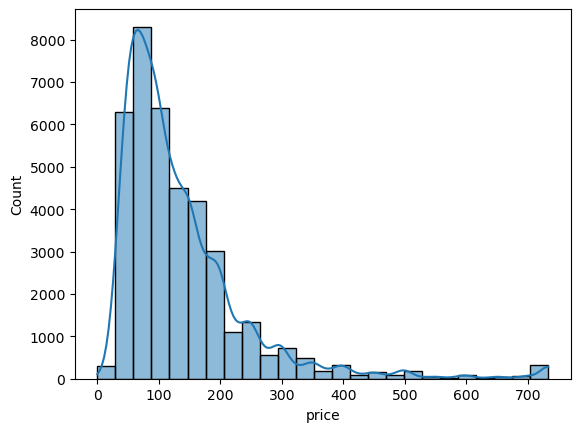

In [26]:
# Now checking the graph.
sns.histplot(new_df['price'],bins=25,kde=True)

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  int64         
 1   name                            38821 non-null  object        
 2   host_id                         38821 non-null  int64         
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   room_type                       38821 non-null  object        
 7   price                           38821 non-null  float64       
 8   minimum_nights                  38821 non-null  int64         
 9   number_of_reviews               38821 non-null  int64         
 10  last_review                     38821 non-null  datetime64[ns]
 11  re

In [28]:
new_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,136.812726,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,108.506908,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,733.316794,1250.000000,629.000000,58.500000,327.000000,365.000000


In [29]:
#price of the Rooms cannot be 0 so we have to 
#replace 0 with mean or median I will choose mean here to replace 0.
new_df[new_df['price']==0].count()

id                                10
name                              10
host_id                           10
host_name                         10
neighbourhood_group               10
neighbourhood                     10
room_type                         10
price                             10
minimum_nights                    10
number_of_reviews                 10
last_review                       10
reviews_per_month                 10
calculated_host_listings_count    10
availability_365                  10
dtype: int64

### Replacing price and availability where there is 0 with mean

In [30]:
#replacing 0 with mean.
new_df['price']=df2['price'].replace(0,new_df['price'].mean())
new_df['availability_365']=new_df['availability_365'].replace(0,new_df['availability_365'].median())

In [31]:
new_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,142.367768,5.869220,29.290255,1.373229,5.166611,132.843719
std,1.069372e+07,7.589752e+07,196.981527,17.389026,48.182900,1.680328,26.302954,115.399241
min,2.539000e+03,2.438000e+03,10.000000,1.000000,1.000000,0.010000,1.000000,1.000000
25%,8.721444e+06,7.029525e+06,69.000000,1.000000,3.000000,0.190000,1.000000,55.000000
50%,1.887286e+07,2.837092e+07,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [32]:
#describing all columns.
df2.describe(include="all")

C:\Users\Himanshu kumar\AppData\Local\Temp\ipykernel_11732\3168801808.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df2.describe(include="all")


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,38821,3.882100e+04,38821,38821,38821,38821,38821.000000,38821.000000,38821.000000,38821,38821.000000,38821.000000,38821.000000
unique,NaN,38253,NaN,9885,5,218,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Home away from home,NaN,Michael,Manhattan,Williamsburg,Entire home/apt,NaN,NaN,NaN,2019-06-23 00:00:00,NaN,NaN,NaN
freq,NaN,12,NaN,335,16621,3163,20321,NaN,NaN,NaN,1413,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-28 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-08 00:00:00,NaN,NaN,NaN
mean,1.810081e+07,NaN,6.424582e+07,NaN,NaN,NaN,NaN,142.332526,5.869220,29.290255,NaN,1.373229,5.166611,114.886299
std,1.069372e+07,NaN,7.589752e+07,NaN,NaN,NaN,NaN,196.994756,17.389026,48.182900,NaN,1.680328,26.302954,129.529950
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,0.010000,1.000000,0.000000
25%,8.721444e+06,NaN,7.029525e+06,NaN,NaN,NaN,NaN,69.000000,1.000000,3.000000,NaN,0.190000,1.000000,0.000000


### Variables Description

* **Id**                     : Unique Id.
* **name**                   : Name of the hosts.
* **host_id**                : Unique host_id.
* **host_name**              : Name of the host.
* **neighbourhood_group**    : location.
* **neighbourhood**          : Area.
* **latitude**               : Latitude range.
* **longitude**              : Longitude range.
* **room_type**              : Type of listing.
* **price**                  : Price of listing.
* **minimum_nights**         : Minimum nights to be paid for.
* **Number_of reviews**      : Number of reviews.
* **last_review**            : Content of the last review.
* **reviews_per_month**      : Number of checks per month.
* **calculated_host_listing_count**:Total Count
* **availablity_365**        : Availablity around the year

## Visualization

In [33]:
new_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,55
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129


## Bar Plot

***Bar Plot shows that there are mainly three types where maximum booking price war of in Entire home / apt room type***

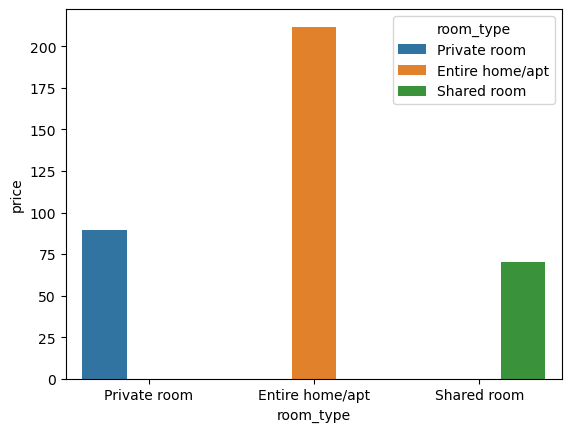

In [34]:
# Ploting barplot
sns.barplot(x='room_type',y='price',data=df,hue='room_type',errorbar=('ci',False))
plt.show()

## Heatmap

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

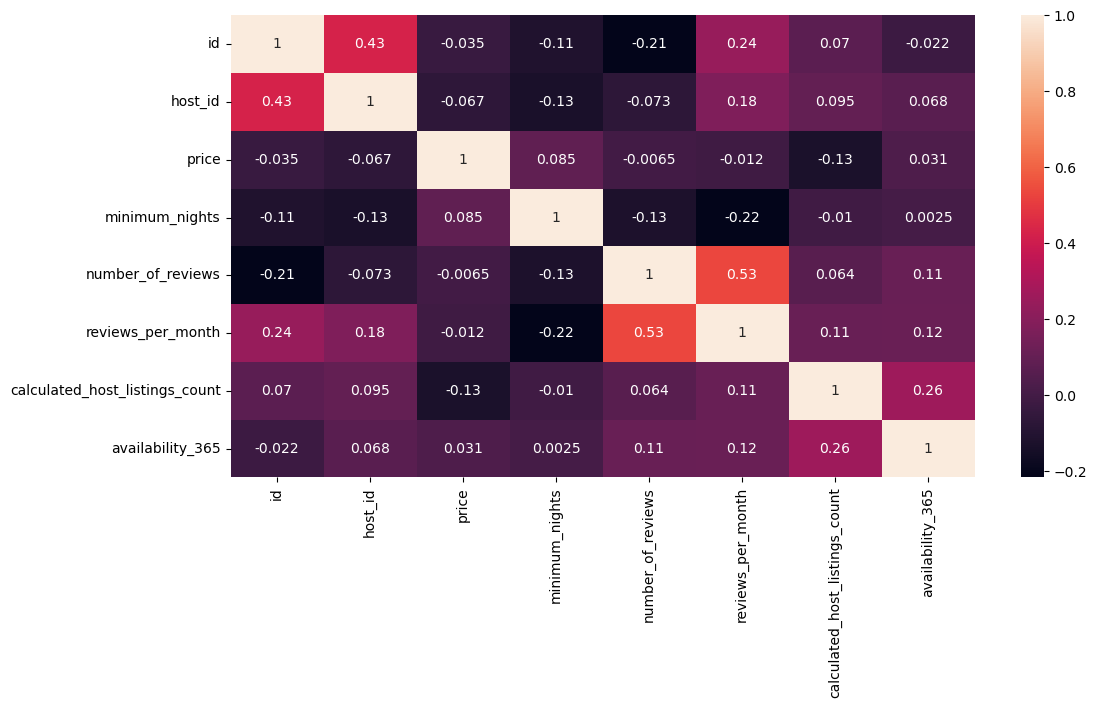

In [35]:
# ploting heatmap
# So that we can know the correlation between all variables.
corr= new_df.corr(method='kendall')
fig=plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)
new_df.columns

## Room type and pric according to area.

In [36]:
# choosing data for ploting the bar graph.
room_price_area_wise=new_df.groupby(['neighbourhood_group','room_type'])['price'].max().reset_index()
room_price_area_wise=room_price_area_wise.sort_values(by='price',ascending=False).head(10)
room_price_area_wise=room_price_area_wise.sort_values(by='neighbourhood_group',ascending=False).head(10)

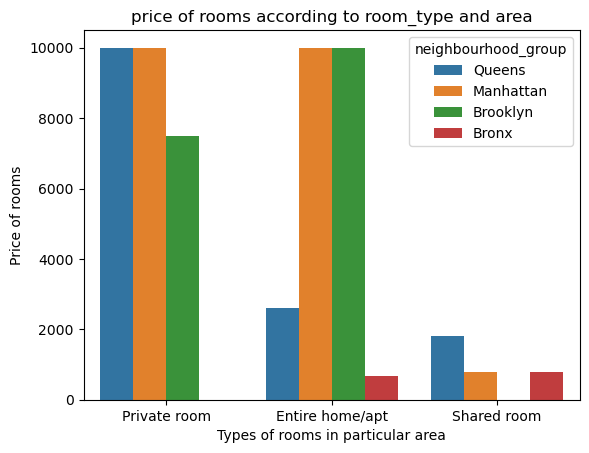

In [37]:
#ploting the graph.
sns.barplot(x='room_type',y='price',hue='neighbourhood_group',data=room_price_area_wise)
plt.xlabel('Types of rooms in particular area')
plt.ylabel('Price of rooms')
plt.title('price of rooms according to room_type and area')
plt.show()

From the above figure we can say that costliest rooms are from groups of private room and entire home/apt category were also the 
the heighest cost of rooms in areas **Queens** and **Manhattan** in **Private Rooms** and in **Entire home/apt** category **Manhattan** and **Brooklyn** has heaighest prices.

## Neighbourhood Groups and number of reviews

In [38]:
#prepairing the data to plot the graph
area_reviews=new_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
area_reviews=area_reviews.sort_values(by='number_of_reviews',ascending=False).head(10)

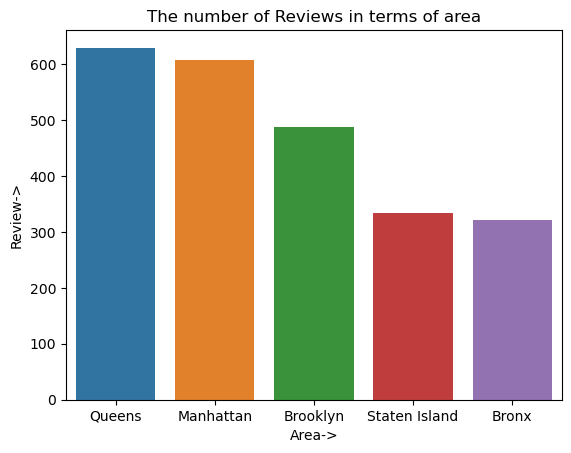

In [50]:
# ploting the bar chart according to the data
sns.barplot(x='neighbourhood_group',y='number_of_reviews',data=area_reviews)
plt.xlabel('Area->')
plt.ylabel('Review->')
plt.title('The number of Reviews in terms of area')
plt.show()

The above graph show the maximum no of review is coming from **Queens** then **Manhattan** then **Brooklyn** then **State Island** and then **Bronx**. This is the top 5 Areas from where heighest reviews are coming which mean the rooms are booked or traffic on this areas are larger then other areas.

# **Conclusion**

•	From the above data we can conclude that the entire data is divided into three types of room type **Private room**,**Entire home/apt** and **Shared rooms**.

•	The heighest price are of room type **Entire home/apt**.

•	From the data we can conclude major 5-10 cities have hieghest room prices are **Queens**, **Manhattan**, **Brooklyn**, **State Island** and **Bronx**.

•	And also the maximum review are coming from these mojor cities. From which we can conclude that these cities might have the heigest tarffic.

•   Stackholders can take this data to expnad the new business in this area or develop other areas so that other areas also perform better.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***